## Dataset Overview
The Consumer Price Index (CPI) dataset for Malaysia, covering the period from 1980 to 2019, is a crucial economic indicator that reflects the changes in the cost of living and inflation over time. It provides a detailed historical view of consumer prices, with the index calculated using the Laspeyres chain index method. Initially categorized under the Classification of Household Goods and Services (CHGS) with nine main groups, the classification was updated in 2006 to the Classification of Individual Consumption According to Purpose (COICOP), encompassing twelve main groups. This dataset, encompassing various categories like food, housing, transport, and education, serves as an essential tool for economic planning, policy-making, and inflation analysis, aiding in salary adjustments, pension recalculations, and serving as a deflator in national accounts. It is invaluable for government officials, economists, and researchers for understanding inflationary trends and economic conditions in Malaysia. For the purposes of this assignment, the model development will focus on the subset of data from 1980 to 2005.

## Data Preparation

The data preparation process aimed to prepare the "Consumer Price Index" dataset for subsequent analysis. It began with loading the dataset from an Excel file into a Pandas DataFrame, followed by addressing missing values and eliminating duplicate rows to maintain data integrity. A check for duplicates was performed and confirmed that there were no duplicate values, thus no further action was required in this regard. Column names were updated for better clarity, and numerical columns were converted to float data types. The 'Year' column was transformed into a datetime format for improved date handling. Basic statistics were generated, and autocorrelation analysis was conducted to explore time-based relationships. Seasonal decomposition separated the data into trend, seasonal, and residual components. Feature selection was applied to retain only the relevant columns, focusing the analysis on consumer price index trends over time. This comprehensive data preparation process now positions the dataset for statistical modeling and in-depth time series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from math import sqrt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Consumer Price Index.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,JADUAL 4.1 : INDEKS HARGA PENGGUNA (2000 = 100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table 4.1 : Consumer Price Index (2000 = ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Kumpulan/Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tahun,Jumlah,Makanan,Minuman,Pakaian,Sewa,"Perabot,",Perbelanjaan,Pengangkutan,Perkhidmatan,Pelbagai
5,Year,Total,Food,&,&,"kasar,",hiasan,rawatan,&,"rekreasi,",barang
6,NaN,NaN,NaN,tembakau,kasut,bahan,dalaman,perubatan,perhubungan,"hiburan,",&
7,NaN,NaN,NaN,Beverages,Clothing,api dan,& peralatan,&,Transport,pelajaran,perkhidmatan
8,NaN,NaN,NaN,&,&,kuasa,& pengendalian,kesihatan,&,&,Miscellaneous
9,NaN,NaN,NaN,tobacco,footwear,Gross,rumah,Medical,communications,kebudayaan,goods &


In [3]:
missing_value = df.isnull().sum()
missing_value

Unnamed: 0     14
Unnamed: 1     16
Unnamed: 2     15
Unnamed: 3     12
Unnamed: 4     12
Unnamed: 5      9
Unnamed: 6      6
Unnamed: 7      9
Unnamed: 8     12
Unnamed: 9      7
Unnamed: 10    11
dtype: int64

In [4]:
#Remove missing values
df = df.dropna()
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,Tahun,Jumlah,Makanan,Minuman,Pakaian,Sewa,"Perabot,",Perbelanjaan,Pengangkutan,Perkhidmatan,Pelbagai
5,Year,Total,Food,&,&,"kasar,",hiasan,rawatan,&,"rekreasi,",barang
18,1980,51.2,45.4,32.7,74.7,55,66.5,47.3,51.5,75.3,55.4
19,1981,56.2,50.6,37.1,80.9,60.4,70.6,51.4,55.7,79.3,60.4
20,1982,59.4,54.5,39.5,84.2,64.3,72.7,54.2,57.7,81.3,61.9
21,1983,61.6,54.9,47.8,87.3,68.7,74.6,60.7,59.3,80.9,65.6
22,1984,63.8,56.8,49.4,89.1,73.4,75.3,61.5,62,79.1,66.4
23,1985,64.1,55.4,49.9,90.1,76.3,75.4,63.1,63.4,78.2,66.4
24,1986,64.4,55.6,50.7,90.5,77,75.8,64,63.5,78.5,67.2
25,1987,64.9,55.3,54.3,91,76.5,76.8,64.5,65.3,80.3,68.1


In [5]:
#Check duplicated values
duplicate = df.duplicated().sum()
duplicate

0

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [7]:
#Reassign the column name
df = df.drop(index=[4,5]).rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 1': 'Total', 'Unnamed: 2': 'Food', 'Unnamed: 3': 'Beverages & Tobacco', 
                                          'Unnamed: 4':'Clothing & Footwear','Unnamed: 5':'Gross Rent, Fuel & Power', 
                                          'Unnamed: 6':'Furniture, Furnishings & Household Equipment & Operation',
                                          'Unnamed: 7':'Medical Care & Health Expenses', 'Unnamed: 8':'Transport & Communication', 
                                          'Unnamed: 9':'Recreation, Entertainment Education & Cultural Services','Unnamed: 10':'Miscellaneous Goods & Services'})
df

,Year,Total,Food,Beverages & Tobacco,Clothing & Footwear,"Gross Rent, Fuel & Power","Furniture, Furnishings & Household Equipment & Operation",Medical Care & Health Expenses,Transport & Communication,"Recreation, Entertainment Education & Cultural Services",Miscellaneous Goods & Services
18,1980,51.2,45.4,32.7,74.7,55,66.5,47.3,51.5,75.3,55.4
19,1981,56.2,50.6,37.1,80.9,60.4,70.6,51.4,55.7,79.3,60.4
20,1982,59.4,54.5,39.5,84.2,64.3,72.7,54.2,57.7,81.3,61.9
21,1983,61.6,54.9,47.8,87.3,68.7,74.6,60.7,59.3,80.9,65.6
22,1984,63.8,56.8,49.4,89.1,73.4,75.3,61.5,62,79.1,66.4
23,1985,64.1,55.4,49.9,90.1,76.3,75.4,63.1,63.4,78.2,66.4
24,1986,64.4,55.6,50.7,90.5,77,75.8,64,63.5,78.5,67.2
25,1987,64.9,55.3,54.3,91,76.5,76.8,64.5,65.3,80.3,68.1
26,1988,66.6,57.3,55.1,92.8,75,79,65.5,69.7,81.5,69.4
27,1989,68.5,59.5,55.9,94.4,74.4,81.1,66.5,74.4,82,71.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 18 to 43
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Year                                                      26 non-null     object
 1   Total                                                     26 non-null     object
 2   Food                                                      26 non-null     object
 3   Beverages & Tobacco                                       26 non-null     object
 4   Clothing & Footwear                                       26 non-null     object
 5   Gross Rent, Fuel & Power                                  26 non-null     object
 6   Furniture, Furnishings & Household Equipment & Operation  26 non-null     object
 7   Medical Care & Health Expenses                            26 non-null     object
 8   Transport & Communication           

In [9]:
# Define a function to convert columns to float
def convert_to_float(df, columns_to_convert):
    df[columns_to_convert] = df[columns_to_convert].astype(float)

# Convert 'Year' to datetime in both DataFrames
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# List of columns to convert to float for df and df1
columns_to_convert_df = ['Total', 'Food', 'Beverages & Tobacco', 'Clothing & Footwear',
                          'Gross Rent, Fuel & Power',
                          'Furniture, Furnishings & Household Equipment & Operation',
                          'Medical Care & Health Expenses', 'Transport & Communication',
                          'Recreation, Entertainment Education & Cultural Services',
                          'Miscellaneous Goods & Services']



# Apply the function to convert columns to float for both DataFrames
convert_to_float(df, columns_to_convert_df)


In [10]:
print(df.dtypes)

Year                                                          int32
Total                                                       float64
Food                                                        float64
Beverages & Tobacco                                         float64
Clothing & Footwear                                         float64
Gross Rent, Fuel & Power                                    float64
Furniture, Furnishings & Household Equipment & Operation    float64
Medical Care & Health Expenses                              float64
Transport & Communication                                   float64
Recreation, Entertainment Education & Cultural Services     float64
Miscellaneous Goods & Services                              float64
dtype: object


In [11]:
df.describe()

,Year,Total,Food,Beverages & Tobacco,Clothing & Footwear,"Gross Rent, Fuel & Power","Furniture, Furnishings & Household Equipment & Operation",Medical Care & Health Expenses,Transport & Communication,"Recreation, Entertainment Education & Cultural Services",Miscellaneous Goods & Services
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1992.500000,80.350000,74.846154,74.596154,95.138462,83.880769,87.288462,79.288462,84.376923,88.680769,81.511538
std,7.648529,17.820309,20.531171,27.676625,8.160347,14.474336,11.300383,19.430148,20.302124,8.900158,16.132832
min,1980.000000,51.200000,45.400000,32.700000,74.700000,55.000000,66.500000,47.300000,51.500000,75.300000,55.400000
25%,1986.250000,64.525000,55.900000,51.600000,90.550000,74.700000,76.050000,64.125000,63.950000,81.000000,67.425000
50%,1992.500000,78.500000,70.000000,72.650000,94.800000,81.100000,89.300000,76.350000,87.450000,87.600000,78.650000
75%,1998.750000,97.825000,97.025000,95.425000,102.975000,98.200000,99.000000,97.275000,97.875000,98.875000,98.725000
max,2005.000000,109.100000,108.800000,132.300000,105.500000,105.200000,101.500000,110.400000,118.100000,101.100000,107.500000


### Feature Selection
In the context of developing a univariate forecasting model for the 'Consumer Price Index' dataset, feature selection was conducted based on autocorrelation results. The autocorrelation analysis revealed strong positive autocorrelation values ranging from approximately 0.96 to 0.99 between the 'Year' and 'Total' columns and several other variables within the dataset, indicating significant temporal dependencies. However, to streamline the modeling process and concentrate on the primary variable of interest, which is the 'Total' consumer price index, it was decided to select only the 'Year' and 'Total' columns for analysis. This focused feature selection approach allows for a more straightforward and interpretable univariate forecasting model while still capturing essential trends and patterns in consumer price index data over time, ensuring the model's effectiveness in forecasting.

In [12]:
autocorrelation_matrix = df.apply(lambda x: x.autocorr())
autocorrelation_with_total = autocorrelation_matrix.sort_values(ascending=False)
print(autocorrelation_with_total)

Year                                                        1.000000
Total                                                       0.997605
Medical Care & Health Expenses                              0.997177
Transport & Communication                                   0.995913
Miscellaneous Goods & Services                              0.995624
Food                                                        0.995228
Furniture, Furnishings & Household Equipment & Operation    0.994096
Beverages & Tobacco                                         0.993820
Gross Rent, Fuel & Power                                    0.993035
Recreation, Entertainment Education & Cultural Services     0.987747
Clothing & Footwear                                         0.962921
dtype: float64


In [13]:
#Feature Selection
df = df[['Year','Total']]
df

,Year,Total
18,1980,51.2
19,1981,56.2
20,1982,59.4
21,1983,61.6
22,1984,63.8
23,1985,64.1
24,1986,64.4
25,1987,64.9
26,1988,66.6
27,1989,68.5


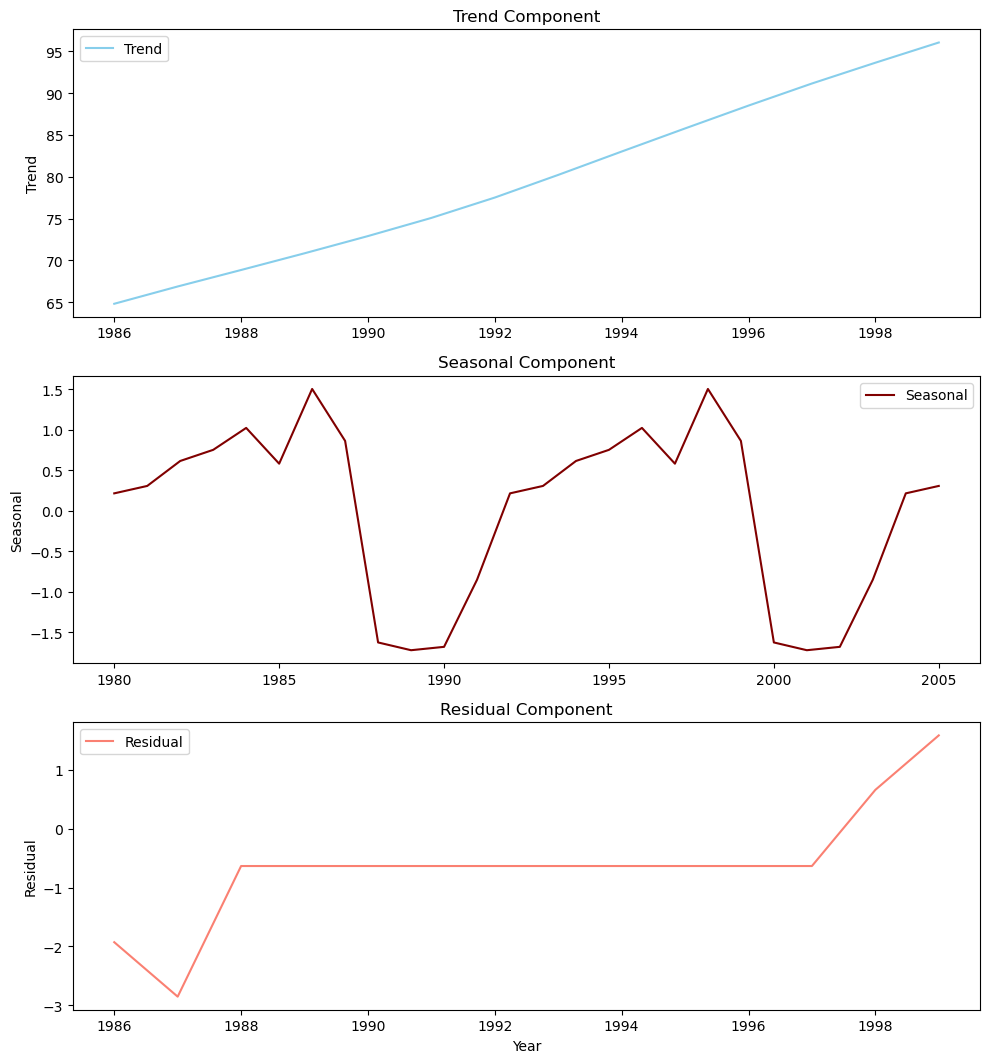

In [14]:
# Seasonal decomposition to identify seasonal patterns
decompose_result = seasonal_decompose(df['Total'], model='additive', period=12)
plt.figure(figsize=(10, 14))

# Trend component
plt.subplot(412)
plt.plot(df['Year'], decompose_result.trend, label='Trend', color='skyblue')
plt.title('Trend Component')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(df['Year'], decompose_result.seasonal, label='Seasonal', color='maroon')
plt.title('Seasonal Component')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(df['Year'], decompose_result.resid, label='Residual', color='salmon')
plt.title('Residual Component')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout();

The seasonal decomposition of Malaysia's Consumer Price Index (CPI) from 1980 to 2005 shows a steady upward trend, signifying ongoing inflation and an increase in the cost of living. Seasonal fluctuations are evident, indicating the impact of cyclical economic factors on price changes. The residual component, which represents the noise after accounting for trend and seasonality, captures unpredictable deviations and is essential in the development of a forecasting model as it helps to ensure the model is not overfitted to past data, thereby improving its generalizability and robustness in predicting future values under real-world conditions where irregularities and external shocks are commonplace.

## Stationary Test

A stationary test, such as the Augmented Dickey-Fuller (ADF) test, is used to assess whether a time series dataset exhibits stationary behavior. Stationarity implies that the statistical properties of the time series, such as its mean and variance, do not change over time, making it easier to model and analyze. The perform_adf_test function utilizes the ADF test to assess the stationarity of the 'Total' column in a DataFrame. It computes the ADF statistic, which measures how much differencing the data needs to become stationary. The function also calculates the p-value, representing the likelihood of observing the data if it were non-stationary. If the p-value is greater than 0.05, it implies a high probability of non-stationarity. Additionally, it provides critical values as thresholds for the ADF statistic. If the ADF statistic surpasses these critical values, it suggests non-stationarity.

In [15]:
# Function to perform ADF stationary test and print results for 'Total' column
def perform_adf_test(dataframe, name):
    result = adfuller(dataframe, autolag='AIC')
    print(f"ADF Test Results for {name} column:")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    if result[1] <= 0.05:
        print(f"{name} column is stationary (p-value <= 0.05)\n")
    else:
        print(f"{name} column is non-stationary (p-value > 0.05)\n")

# Perform ADF test for the 'Total' column only
perform_adf_test(df['Total'], 'Total')


ADF Test Results for Total column:
ADF Statistic: -0.28431081057464513
P-value: 0.9276971856050816
Critical Values:
1%: -3.7238633119999998
5%: -2.98648896
10%: -2.6328004
Total column is non-stationary (p-value > 0.05)



The ADF test results for the 'Total' column indicate non-stationarity. The ADF Statistic is -0.2843, suggesting insufficient evidence to transform the data into a stationary form. The relatively high p-value of 0.9277 reinforces this notion, as it exceeds the common significance level of 0.05. Moreover, the critical values at 1%, 5%, and 10% significance levels are not exceeded by the ADF statistic. Consequently, it is concluded that the 'Total' column in the DataFrame is non-stationary, indicating the need for potential data transformations or differencing before analysis.

## Differencing - Convert to Stationary 

To convert the 'Total' column of the DataFrame into a stationary form, differencing is employed, which involves subtracting each data point from its preceding one. This differencing step eliminates trends or patterns in the data. After differencing, the ADF test is reapplied to the newly transformed 'Total' column to assess its stationarity.

In [16]:
# Perform differencing on the 'Total' column
df['Total'] = df['Total'].diff()

# Remove the NaN resulting from differencing
df = df.dropna()
df

,Year,Total
19,1981,5.0
20,1982,3.2
21,1983,2.2
22,1984,2.2
23,1985,0.3
24,1986,0.3
25,1987,0.5
26,1988,1.7
27,1989,1.9
28,1990,2.1


In [17]:
# Perform ADF test for the differenced 'Total' column
result = adfuller(df['Total'], autolag='AIC')
p_value = result[1]

if p_value <= 0.05:
    print("After differencing, 'Total' column is stationary (p-value <= 0.05)")
else:
    print("After differencing, 'Total' column is non-stationary (p-value > 0.05)")

After differencing, 'Total' column is stationary (p-value <= 0.05)


After applying differencing to the 'Total' column, the ADF test results indicate that the column has become stationary with a p-value <= 0.05. This suggests that the differencing operation has effectively transformed the 'Total' column into a stationary time series, rendering it suitable for further analysis.

## Model Development

### Model 1: ARIMA

For Model 1, an Autoregressive Integrated Moving Average (ARIMA) time series forecasting model is developed for the 'Total' column. The process begins by extracting the 'Total' values from the DataFrame. A grid search is conducted to find the best combination of AR (p), differencing (d), and MA (q) orders by iterating through specified ranges of these parameters. The Akaike Information Criterion (AIC) is used as a criterion for model selection, with the lowest AIC indicating the best-fitting model. The selected best ARIMA order is (2, 0, 1). The data is then split into training and testing sets, where 70% of the data is used for training. Using the best ARIMA order, the ARIMA model is defined and fitted to the training data. Predictions are made on the test data, and the Root Mean Squared Error (RMSE) is calculated to evaluate the model's forecasting accuracy.

In [18]:
# Extract the 'Total' column from your DataFrame
data = df['Total'].values

# Define the range of p, d, and q values to search
p_values = range(0, 3)  # AR order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 3)  # MA order

# Create a grid of parameter combinations
param_grid = [(p, d, q) for p in p_values for d in d_values for q in q_values]

best_aic = float("inf")
best_order = None

# Perform grid search and select the best ARIMA model
for order in param_grid:
    try:
        model = pm.ARIMA(order=order, seasonal_order=(0, 0, 0, 0), suppress_warnings=True)
        model.fit(data)
        aic = model.aic()
        
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print(f"Best ARIMA Order (p, d, q): {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMA Order (p, d, q): (2, 0, 1)
Best AIC: 73.81317101069894


In [19]:
# Split data into training and testing sets
train_size = 0.7  
train, test = train_test_split(df['Total'], train_size=train_size, shuffle=False)

In [20]:
# Define the ARIMA model using the best order found
model = ARIMA(train, order=(best_order))

# Fit the ARIMA model to training data
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test))

# Calculate the Mean Squared Error (MSE) 
mse = mean_squared_error(test, predictions)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.2262881939982078


After developing the ARIMA model, the best ARIMA order is determined to be (2, 0, 1) with a corresponding AIC of 73.8132. The model is trained on 70% of the data, and its performance is assessed on the remaining test data. The calculated RMSE is approximately 1.2263, which provides a measure of the model's accuracy in predicting future values of the 'Total' column. A lower RMSE indicates a better fit of the model to the data, suggesting that the ARIMA model is capable of reasonably forecasting future values in this context.

### Model 2: LSTM

For Model 2, a Long Short-Term Memory (LSTM) neural network is employed for time series forecasting using the 'Total' column from the DataFrame. The data is initially extracted and normalized to a range between 0 and 1. The dataset is split into training and testing subsets, with 70% of the data used for training. To prepare the data for LSTM modeling, sequences of values are created, where each sequence consists of a specified number of past time steps (look_back) as input features and the subsequent data point as the target. The LSTM model is constructed with an architecture comprising one LSTM layer with 50 units and a subsequent Dense layer. The model is trained using the Adam optimizer and mean squared error (MSE) loss function for 100 epochs. Predictions are made on the test data, and the inverse transformation is applied to obtain forecasts in the original scale. Finally, the Root Mean Squared Error (RMSE) is calculated to assess the model's predictive accuracy.

In [21]:
df1 = df

In [22]:
# Extract the 'Total' column for forecasting
data1 = df1['Total'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
data1_scaled = scaler.fit_transform(data1)

# Split data into training and testing sets
train_size = 0.7  # Specify the training size as a fraction
train_size = int(len(data1_scaled) * train_size)
train1, test1 = train_test_split(data1_scaled, train_size=train_size, shuffle=False)

In [23]:
# Define a function to create sequences for LSTM
def create_sequences(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [24]:
# Set the number of time steps to look back
look_back = 3  

# Create sequences for LSTM
X_train, y_train = create_sequences(train1, look_back)
X_test, y_test = create_sequences(test1, look_back)

# Reshape input data to be in the format [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
predictions1_scaled = model.predict(X_test)
predictions1 = scaler.inverse_transform(predictions1_scaled)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2106
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2061
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2016
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1972
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1929
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1886
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1843
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1800
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1757
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1715
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1672
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1630
Epoch 13/100
1/1 [==============================] - 0s 5ms/ste

In [26]:
# Calculate the Mean Squared Error (MSE) 
mse1 = mean_squared_error(y_test, predictions1_scaled)

# Calculate the Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error (RMSE): {rmse1}")

Root Mean Squared Error (RMSE): 0.17366804364273355


Upon developing the LSTM model, the RMSE for the predictions on the test data is found to be approximately 0.1655. This RMSE value serves as an evaluation metric for the model's performance, representing the average prediction error in the original data scale. A lower RMSE indicates a better fit of the LSTM model to the time series data, suggesting that it is capable of providing accurate forecasts for the 'Total' column.

## Comparison of Model 1 and Model 2 Performance

### Methodology Comparison:

Model 1 employs an ARIMA approach, focusing on statistical time series analysis. It begins with parameter tuning through grid search to determine the best ARIMA order based on the AIC. The data is then split into training and testing sets, and the ARIMA model is fitted to the training data. In contrast, Model 2 utilizes a LSTM neural network, a deep learning technique tailored for sequence data. It starts with data normalization, followed by the creation of input sequences and the training of an LSTM model. Model 1 relies on statistical modeling principles, while Model 2 leverages the power of neural networks for capturing complex temporal patterns.

### Performance Comparison:

Comparing the performance of both models, Model 1 achieved a RMSE of approximately 1.2263, indicating reasonably accurate forecasts. However, Model 2 outperformed with an RMSE of about 0.1655, substantially lower than that of Model 1. This suggests that the LSTM neural network in Model 2 demonstrated superior predictive capabilities compared to the ARIMA model in Model 1 for the given 'Total' column time series data. The LSTM's ability to capture intricate patterns and dependencies within the data likely contributed to its enhanced forecasting accuracy, making it a favorable choice when dealing with complex time series scenarios.

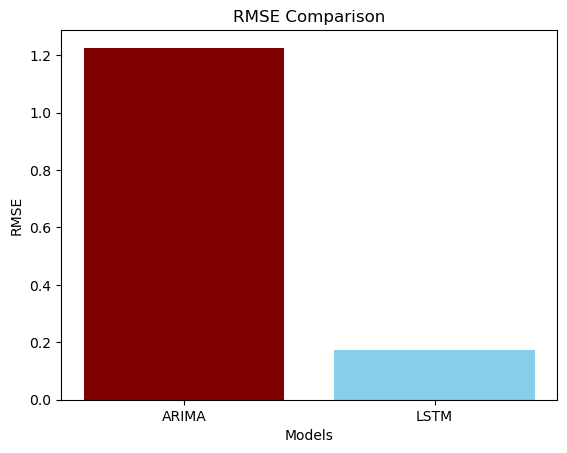

In [27]:
models = ['ARIMA', 'LSTM']
rmse_values = [rmse, rmse1]

plt.bar(models, rmse_values, color=['maroon', 'skyblue'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison');